"Assignment 1"

In [1]:
import warnings

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point



"The dataset is the land surface temperatures during the pliocene era."

"The cell below sets the path to show where to find the files on the COLA servers also below shows the dimensions and variables saved in the file"

In [2]:
path='/shared/CAREER_PWC/PlioMIP2/NCAR/'
fname='b.e12.B1850.f09_g16.PMIP4-pliomip2.cam.h0.TS.1101.1200.nc'
ds=xr.open_dataset(path+fname)
ds


<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1200)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1101-02-01 00:00:00 ... 1201-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    TS         (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...

"This command takes the mean surface temperatures"

In [3]:
ds_mean=ds.mean(dim='time')

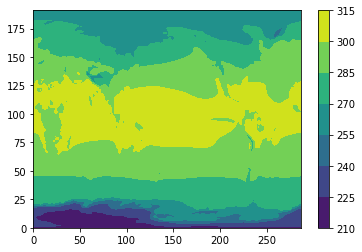

In [4]:
plt.contourf(ds_mean['TS'])
plt.colorbar()


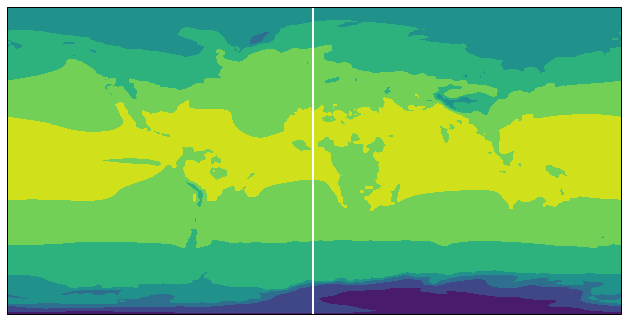

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds_mean['TS'],
            transform = ccrs.PlateCarree())

# Add coastlines
#ax.coastlines()



Adds the longitude and latitude of the 

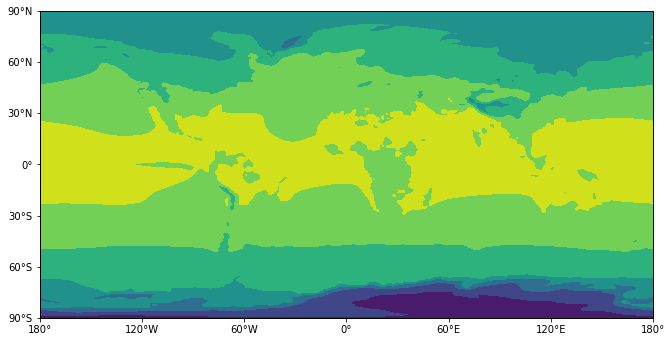

In [6]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['TS']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree())


# Add coastlines
#ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

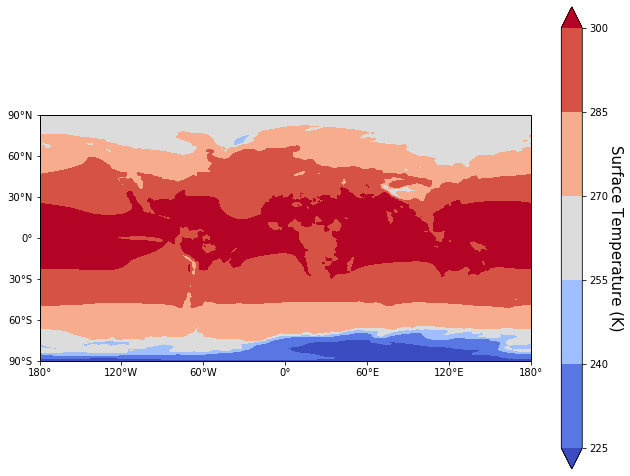

In [7]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['TS']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
#ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs).ax.set_ylabel('Surface Temperature (K)', rotation=270, fontsize = 15, labelpad=15)




Text(0.5, 1.0, 'Pliocene Land Surface Temperatures')

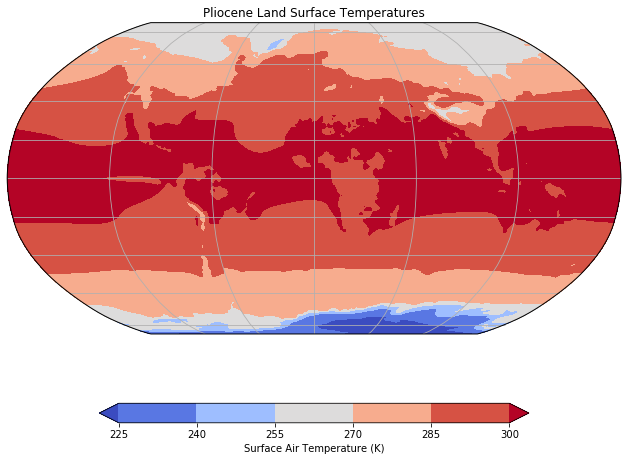

In [8]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['TS']
data, lons = add_cyclic_point(data, coord=ds['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
#ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Air Temperature (K)')

# Add title
plt.title('Pliocene Land Surface Temperatures')